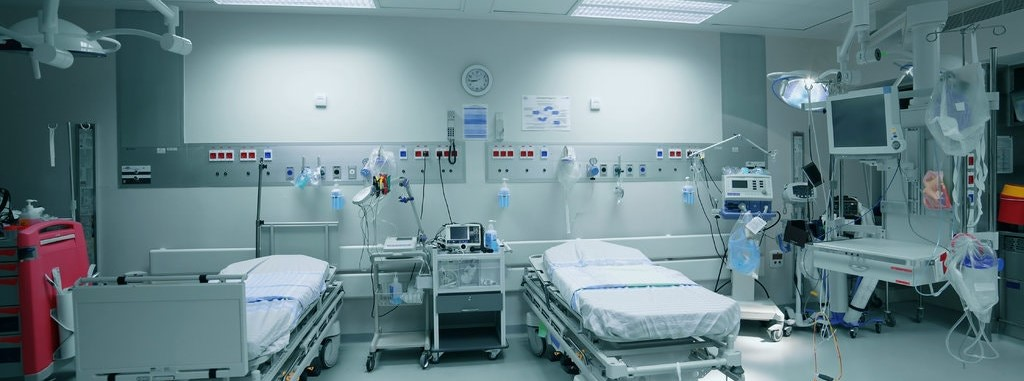

Note :

       This Notebook is for beginners who are new to data science .
       In here I will try to cover the basics how a project is maintained from start to end.
       Before starting this I recommend to understand basic in-built functions of Python related to data science.
       And after all try to analyze every single cell and don't copy the code rather try to fork and edit it as per your usage.
       
       
 **Thank You**

# Libraries

When it is time to code, it is easier to use library function that help us gain time in short or mid-range time based competitions.
Otherwise we have to write large codes 

In [1]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as srn

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Data gathering and basic visualization

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [3]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print('shape of the dataset is :',df.shape)

shape of the dataset is : (1338, 7)


Dataset is medium in size and this size is quite good for predicting

# Pre-processing

Preprocessing is done in some steps ---

                                 1. Checking leakages 
                                 2. Filling leakages (if any)
                                 3. Searching unnecessary column/row for deletion
                                 4. Unnecessary column/row deletion (if any)
                                 5. Encoding (if any)

1. **Checking leakages  :**

In [5]:
l1=df.isnull()
for col in l1.columns:
    print('leakage in '+col+' is :  ',len(l1[l1[col]==True]))

leakage in age is :   0
leakage in sex is :   0
leakage in bmi is :   0
leakage in children is :   0
leakage in smoker is :   0
leakage in region is :   0
leakage in charges is :   0


It is great that this data is leakage - free. 

So, we don't have to replace or fill any leakages 

3. Searching unnecessary column/row for deletion :

In [6]:
for col in df.columns:
    print(col,end=" ")

age sex bmi children smoker region charges 

As every single column are pairwise unique , so deleting any data would shorten the tarining data and increase loss in prediction

5. Encoding :

Checking the type of the columns :

In [7]:
colm=[]
for col in df.columns:
    print('type of '+col+' is : ',df[col].dtypes)
    colm.append(col)

type of age is :  int64
type of sex is :  object
type of bmi is :  float64
type of children is :  int64
type of smoker is :  object
type of region is :  object
type of charges is :  float64


For prediction purposes we have to change the object/categorical data into numerical data .
We need encoding for that.

In [8]:
a=df['sex'].value_counts()
print('index  count')
print(a)
print('\n\n')
b=df['smoker'].value_counts()
print('index  count')
print(b)
print('\n\n')
c=df['region'].value_counts()
print(' index      count')
print(c)

index  count
male      676
female    662
Name: sex, dtype: int64



index  count
no     1064
yes     274
Name: smoker, dtype: int64



 index      count
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [9]:
#   'sex' column encoding
k=0
for i in a.index:
    df['sex'].replace(i,k,inplace=True)
    k+=1

#   'smoker' column encoding

k=0
for i in b.index:
    df['smoker'].replace(i,k,inplace=True)
    k+=1

#   'region' column encoding

k=0
for i in c.index:
    df['region'].replace(i,k,inplace=True)
    k+=1
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


# Data visualization ( visual prediction )

Now we will see the how the charges change as per features.

In [10]:
charge=df['charges']
charge

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

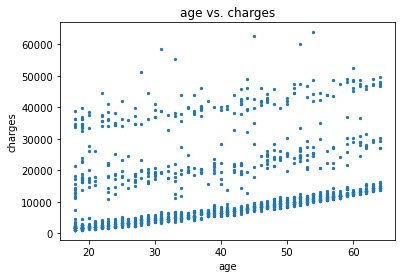

In [11]:
age=df['age']
plt.title('age vs. charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.scatter(age,charge,s=5)
plt.show()

It is visible the charges are in 3 ranges ,as well as the charges are incrasing with increasing age.

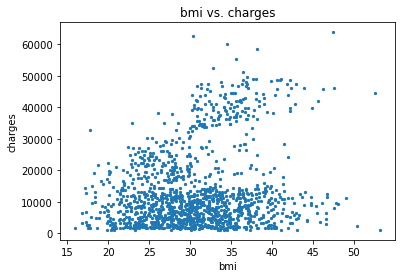

In [12]:
bmi=df['bmi']
plt.title('bmi vs. charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.scatter(bmi,charge,s=5)
plt.show()

Charges are averaging in a lower 15000s , still there are not so few charges crossing 40000 barrier.

These could be the severe cases.

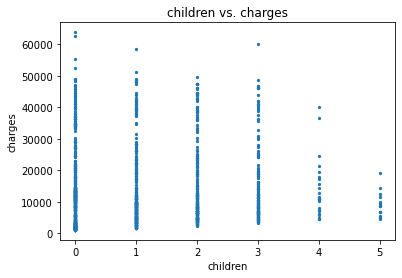

In [13]:
children=df['children']
plt.title('children vs. charges')
plt.xlabel('children')
plt.ylabel('charges')
plt.scatter(children,charge,s=5)
plt.show()

People with less children are facing more bills aka they're having severe problems than others.

It concludes that people are much fit who has more children or should we say that it is vice-cersa ??   XD

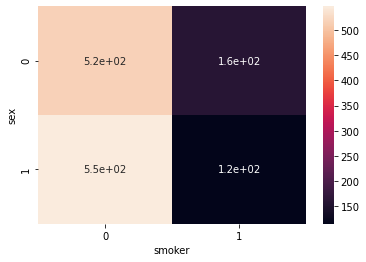

In [14]:
sex=df['sex']
smoker=df['smoker']
confusion_matrix=pd.crosstab(sex, smoker, rownames=['sex'], colnames=['smoker'])
srn.heatmap(confusion_matrix, annot=True)
plt.show()

male-0 female-1

non_smoker-0 smoker-1



It is clearly visible that non-smokers are bigger in number .

and as well as men are bigger in number being a smoker

**This is an *additional conclusion* of the data**

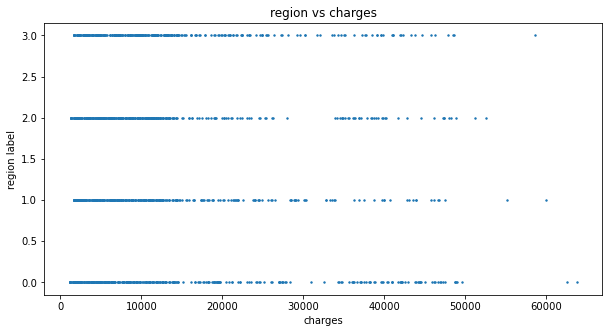

In [15]:
reg=df['region']
plt.figure(figsize=(10,5))
plt.scatter(charge,reg,s=2)
plt.title('region vs charges')
plt.xlabel('charges')
plt.ylabel('region label')
plt.show()

Moreover it is seen that severs cases are low in number in every region.

# Pipeline

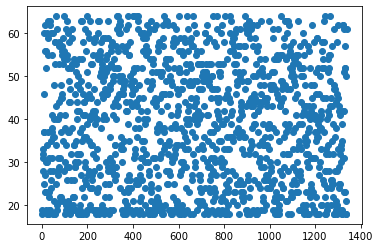

In [16]:
xx=np.arange(1,len(df)+1,1)
plt.scatter(xx,df['age'])

As the data looks like quite shuffled so we are not doing **random reshuffling**.

Creating X and Y for prediction

In [17]:
X_df=df.drop('charges',1)
y_df=df['charges']

In [18]:
print('shape of X :',X_df.shape)
print('shape of Y :',y_df.shape)

shape of X : (1338, 6)
shape of Y : (1338,)


As we have to predict this model and we don't have any test data we are going to split the data into train and test

The data is short in size so we are going to do a 80%-20% train-test split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.2)
print('shape of X_train :',X_train.shape)
print('shape of X_test :',X_test.shape)
print('shape of y_train :',y_train.shape)
print('shape of y_test :',y_test.shape)

shape of X_train : (1070, 6)
shape of X_test : (268, 6)
shape of y_train : (1070,)
shape of y_test : (268,)


* ***prediction with regression models*** 

* Ridge Regression

alpha :  0.1     accuracy :  0.7446124132209286
alpha :  0.2     accuracy :  0.7446117866907924
alpha :  0.30000000000000004     accuracy :  0.7446107442595278
alpha :  0.4     accuracy :  0.7446092873822887
alpha :  0.5     accuracy :  0.7446074175091344
alpha :  0.6     accuracy :  0.7446051360850487
alpha :  0.7000000000000001     accuracy :  0.7446024445499603
alpha :  0.8     accuracy :  0.7445993443387615
alpha :  0.9     accuracy :  0.7445958368813286
alpha :  1.0     accuracy :  0.7445919236025412


Text(0, 0.5, 'accuracy')

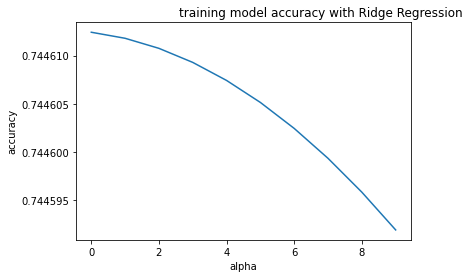

In [20]:
alp=np.arange(0.1,1.1,0.1)
arr=[]
ar1=[]
for i in alp:
    clf=Ridge(alpha=i)
    clf.fit(X_train,y_train)
    m=clf.score(X_train,y_train)
    print('alpha : ',i,'    accuracy : ',m)
    arr.append(m)
plt.plot(arr)
plt.title('                                        training model accuracy with Ridge Regression')
plt.xlabel('alpha')
plt.ylabel('accuracy')

We can see increase of the value of alpha decreases the model accuracy over the training data.

RMSE for 0.1 is : 5937.544851895141
RMSE for 0.2 is : 5937.991156807221
RMSE for 0.30000000000000004 is : 5938.442153944549
RMSE for 0.4 is : 5938.897824830492
RMSE for 0.5 is : 5939.35815104495
RMSE for 0.6 is : 5939.823114224242
RMSE for 0.7000000000000001 is : 5940.292696060986
RMSE for 0.8 is : 5940.766878303972
RMSE for 0.9 is : 5941.245642758052
RMSE for 1.0 is : 5941.72897128401


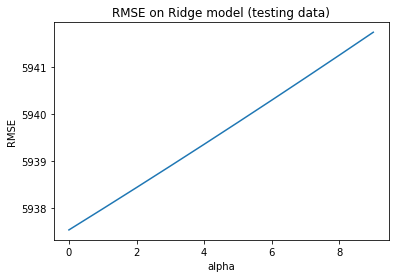

In [21]:
mm=[]
for i in alp:
    model=Ridge(alpha=i)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    xx=np.sqrt(mean_squared_error(y_test,y_pr))
    mm.append(xx)
    print('RMSE for '+str(i)+' is :',xx)
plt.plot(mm)
plt.title('RMSE on Ridge model (testing data)')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

The increase in alpha may lower the accuracy a bit , but it enhances the test accuracy

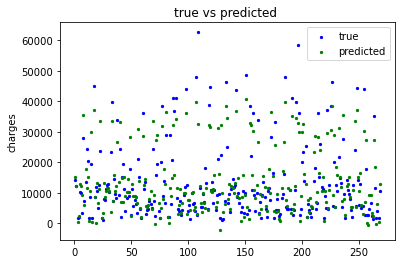

In [22]:
arrr=np.arange(1,len(y_test)+1,1)
plt.scatter(arrr,y_test,label='true',color='b',s=5)
plt.legend()
plt.scatter(arrr,y_pr,label='predicted',color='g',s=5)
plt.legend()
plt.title('true vs predicted ')
plt.ylabel('charges')
plt.show()

In [23]:
print(' best accuracy with ridge regression on training data :',max(arr))
print(' least RMSE with ridge regression on testing data :',min(mm))

 best accuracy with ridge regression on training data : 0.7446124132209286
 least RMSE with ridge regression on testing data : 5937.544851895141


* Lasso Regression

alpha :  0.1     accuracy :  0.7446126216104398
alpha :  0.2     accuracy :  0.7446126192720994
alpha :  0.30000000000000004     accuracy :  0.7446126153746427
alpha :  0.4     accuracy :  0.7446126099180699
alpha :  0.5     accuracy :  0.7446126029023807
alpha :  0.6     accuracy :  0.7446125943275754
alpha :  0.7000000000000001     accuracy :  0.744612584215766
alpha :  0.8     accuracy :  0.7446125725258508
alpha :  0.9     accuracy :  0.7446125592768
alpha :  1.0     accuracy :  0.7446125444686136


Text(0, 0.5, 'accuracy')

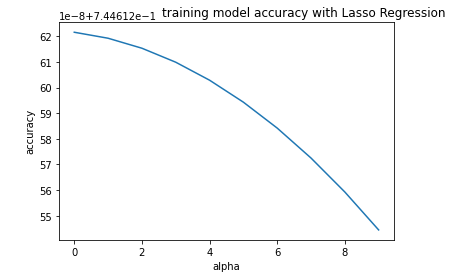

In [24]:
arr=[]
ar1=[]
for i in alp:
    clf=Lasso(alpha=i)
    clf.fit(X_train,y_train)
    m=clf.score(X_train,y_train)
    print('alpha : ',i,'    accuracy : ',m)
    arr.append(m)
plt.plot(arr)
plt.title('                                        training model accuracy with Lasso Regression')
plt.xlabel('alpha')
plt.ylabel('accuracy')

RMSE for 0.1 is : 5937.102288425507
RMSE for 0.2 is : 5937.101298597139
RMSE for 0.30000000000000004 is : 5937.100329234901
RMSE for 0.4 is : 5937.099380338799
RMSE for 0.5 is : 5937.098451908847
RMSE for 0.6 is : 5937.097543945053
RMSE for 0.7000000000000001 is : 5937.096985597366
RMSE for 0.8 is : 5937.096117250637
RMSE for 0.9 is : 5937.095269370262
RMSE for 1.0 is : 5937.094441956251


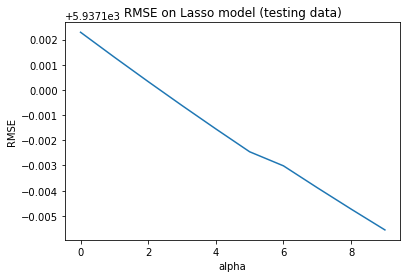

In [25]:
mm=[]
for i in alp:
    model=Lasso(alpha=i)
    model.fit(X_train,y_train)
    y_pr=model.predict(X_test)
    xx=np.sqrt(mean_squared_error(y_test,y_pr))
    mm.append(xx)
    print('RMSE for '+str(i)+' is :',xx)
plt.plot(mm)
plt.title('RMSE on Lasso model (testing data)')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

The lasso and ridge model showed similar gesture

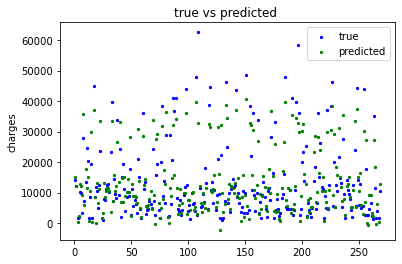

In [26]:
arrr=np.arange(1,len(y_test)+1,1)
plt.scatter(arrr,y_test,label='true',color='b',s=5)
plt.legend()
plt.scatter(arrr,y_pr,label='predicted',color='g',s=5)
plt.legend()
plt.title('true vs predicted ')
plt.ylabel('charges')
plt.show()

In [27]:
print(' best accuracy with ridge regression on training data :',max(arr))
print(' least RMSE with ridge regression on testing data :',min(mm))

 best accuracy with ridge regression on training data : 0.7446126216104398
 least RMSE with ridge regression on testing data : 5937.094441956251


* Polynomial Regression

In [28]:
print('shape of X_train',X_train.shape)

shape of X_train (1070, 6)


For polynomial regression we we have 6 features to works on. 

So degree of polynomial regression will be better if we do it under 6. Otherwise it will overfit the training data.

In [29]:
tr=[]
ts=[]
for i in range(10):
    model=make_pipeline(PolynomialFeatures(i+1),LinearRegression())
    model.fit(X_train,y_train)
    x1=model.score(X_train,y_train)
    y_pr=model.predict(X_test)
    x2=np.sqrt(mean_squared_error(y_test,y_pr))
    tr.append(x1)
    ts.append(x2)
    print('tarining accuracy with '+str(i+1)+' degree  :',x1)
    print('RMSE with '+str(i+1)+' degree  :',x2)

tarining accuracy with 1 degree  : 0.7446126223896667
RMSE with 1 degree  : 5937.103257741601
tarining accuracy with 2 degree  : 0.8388659603884174
RMSE with 2 degree  : 4480.543231047984
tarining accuracy with 3 degree  : 0.8477117407491761
RMSE with 3 degree  : 4559.8035515300935
tarining accuracy with 4 degree  : 0.8628792612839571
RMSE with 4 degree  : 5000.210916739483
tarining accuracy with 5 degree  : 0.8924127819845058
RMSE with 5 degree  : 9227.271941853582
tarining accuracy with 6 degree  : 0.9224059212693483
RMSE with 6 degree  : 56825.622859043775
tarining accuracy with 7 degree  : 0.9533740178219952
RMSE with 7 degree  : 4616192.299758944
tarining accuracy with 8 degree  : 0.9719642213022531
RMSE with 8 degree  : 6581058.367427744
tarining accuracy with 9 degree  : 0.9726149364170459
RMSE with 9 degree  : 11130070.007873876
tarining accuracy with 10 degree  : 0.9820873908831882
RMSE with 10 degree  : 22184095.120313007


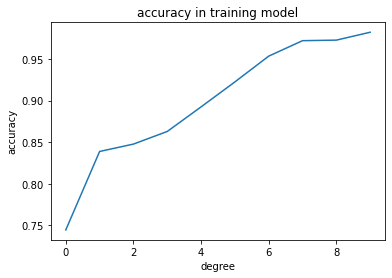

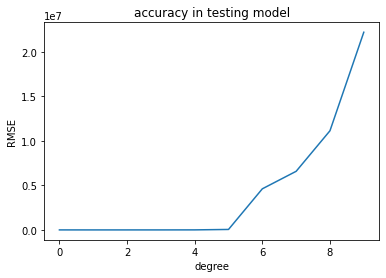

In [30]:
plt.plot(tr)
plt.title('accuracy in training model')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.show()
plt.plot(ts)
plt.title('accuracy in testing model')
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.show()

In [31]:
for i in range(len(tr)):
    print('degree '+str(i+1)+'  : ',ts[i]/tr[i])

degree 1  :  7973.412052414319
degree 2  :  5341.190896544868
degree 3  :  5378.955289094272
degree 4  :  5794.7978831930795
degree 5  :  10339.690475224263
degree 6  :  61605.87388776133
degree 7  :  4841953.119621133
degree 8  :  6770885.412438678
degree 9  :  11443449.602856431
degree 10  :  22588717.996229358


Our hypothesis worked as predicted. The RMSE increased after we overfit the data (degree>6). the **degree = 6** is th best for it.

In [32]:
print('accuracy of the best fitted model by Polynomial Regression :',tr[5])
print('RMSE of the best fitted model by Polynomial Regression :',ts[5])

accuracy of the best fitted model by Polynomial Regression : 0.9224059212693483
RMSE of the best fitted model by Polynomial Regression : 56825.622859043775


* Random Forest Regression

In [33]:
model=RandomForestRegressor(random_state=0)   
model.fit(X_train,y_train)
y_pr=model.predict(X_test)
print('RMSE of randomforest regression model  :',np.sqrt(mean_squared_error(y_test,y_pr)))
print('accuracy of the training data with randomforest regression model : ',model.score(X_train,y_train))

RMSE of randomforest regression model  : 4643.2972658180015
accuracy of the training data with randomforest regression model :  0.975439688319258


Conclusion :

   **Model Accuracy** : RandomForestRegressor > Ridge Regressor > Lasso Regressor > PolynomialRegressor
             

# Creating Output file

* Making output 

In [34]:
id1=np.arange(1,len(y_test)+1,1)
x=pd.DataFrame({'id': id1,'charges':y_pr})


Generating ***output*** file

In [35]:
x.to_csv('submission.csv',index=False)

This is the **generalized method** how you interpret a **data science prediction-based project**.

# UPVOTE if you like the kernel  :)

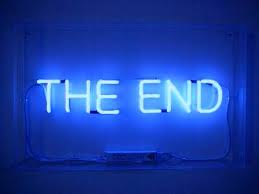